<a href="https://colab.research.google.com/github/mariaeco/Projeto_IntroducaoCienciasdeDados_UFPB/blob/main/ProjetoICD_Maria_ExploracaoInicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Título: "Efeito das diferenças socioeconômicas sobre as notas do Enem na Paraíba"**

## **Objetivo geral:**
Avaliar o perfil socioeconômico dos Estudantes na Paraíba e seus efeitos sobre o desempenho no Exame Nacional de Ensino Médio

###*Objetivos Específicos:*
Avaliar a relação dos fatores abaixo com o desempenho no Enem:
- tipo de escola (privada, particular)
- tipo de dependência admnistrativa (Federal, Estadual, Municipal, Privada)
- cor/raça
- tipo de localização (Rural, Urbana)
- escolaridade dos pais
- tipo de ocupação dos pais
- renda familiar
- numero de pessoas na casa
- acesso a celular, computador e internet

#**EXPLORAÇÕES INICIAIS**


###**Pacotes Utilizados**

In [ ]:
# !pip install plotly==5.1.0

In [ ]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import zipfile

import warnings
warnings.filterwarnings('ignore')

###**Banco de Dados Selecionado**

In [ ]:
dfEnem = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DadosEnem/ENEM_PB_1998_2019.csv',sep=',')
dfEnemESCOLA = pd.read_csv('https://github.com/mariaeco/Projeto_IntroducaoCienciasdeDados_UFPB/blob/main/DADOS/ENEM_POR_ESCOLA_PB_1998-2019.zip?raw=true', compression = 'zip', sep=',')

In [ ]:
dfEnem.query('NU_ANO == 1998').sample(10)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_PRESENCA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Escolaridade_Pai,Escolaridade_Mae,NPessoas,Renda,Celular,Computador,Internet,NU_NOTA_OBJETIVA,NU_MEDIA_GERAL
147729,7071,1998,2504009.0,CAMPINA GRANDE,25.0,PB,18.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,P,300.0,100.0,100.0,0.0,0.0,500.0,Fundamental Incompleto,Superior Completo,NaN,2-5,NaN,1.0,NaN,286.0,393.0
147867,9869,1998,2508901.0,MAMANGUAPE,25.0,PB,17.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,P,600.0,200.0,200.0,0.0,0.0,1000.0,Ensino Médio Completo,Superior Completo,5.0,2-5,NaN,0.0,NaN,413.0,706.5
147858,9339,1998,2504009.0,CAMPINA GRANDE,25.0,PB,18.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,P,600.0,200.0,150.0,0.0,0.0,950.0,Ensino Médio Completo,Superior Completo,3.0,10-30,NaN,0.0,NaN,635.0,792.5
147744,7093,1998,2504009.0,CAMPINA GRANDE,25.0,PB,18.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,P,300.0,100.0,0.0,0.0,0.0,400.0,NaN,Pós-Graduação,6.0,Nenhum,NaN,1.0,NaN,508.0,454.0
147692,808,1998,2507507.0,JOÃO PESSOA,25.0,PB,17.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,P,600.0,200.0,150.0,0.0,0.0,950.0,Superior Incompleto,Superior Completo,3.0,10-30,NaN,1.0,NaN,714.0,832.0
147780,8634,1998,2504009.0,CAMPINA GRANDE,25.0,PB,17.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,P,450.0,150.0,100.0,0.0,0.0,700.0,Superior Completo,Superior Completo,5.0,10-30,NaN,0.0,NaN,603.0,651.5
147724,7066,1998,2504009.0,CAMPINA GRANDE,25.0,PB,17.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,P,450.0,150.0,150.0,0.0,0.0,750.0,Superior Completo,Superior Completo,3.0,NaN,NaN,0.0,NaN,619.0,684.5
147758,7989,1998,2504009.0,CAMPINA GRANDE,25.0,PB,17.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,P,450.0,150.0,150.0,0.0,0.0,750.0,Pós-Graduação,Superior Completo,3.0,Nenhum,NaN,0.0,NaN,365.0,557.5
147745,7975,1998,2504009.0,CAMPINA GRANDE,25.0,PB,17.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,P,300.0,100.0,200.0,0.0,0.0,600.0,Superior Completo,Ensino Médio Incompleto,5.0,5-10,NaN,1.0,NaN,587.0,593.5
147878,9881,1998,2507507.0,JOÃO PESSOA,25.0,PB,24.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,P,450.0,150.0,200.0,0.0,0.0,800.0,Superior Incompleto,Fundamental Incompleto,6.0,5-10,NaN,1.0,NaN,698.0,749.0


In [ ]:
dfEnem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907892 entries, 0 to 1907891
Data columns (total 38 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   NU_INSCRICAO             int64  
 1   NU_ANO                   int64  
 2   CO_MUNICIPIO_RESIDENCIA  float64
 3   NO_MUNICIPIO_RESIDENCIA  object 
 4   CO_UF_RESIDENCIA         float64
 5   SG_UF_RESIDENCIA         object 
 6   NU_IDADE                 float64
 7   TP_SEXO                  object 
 8   TP_COR_RACA              object 
 9   CO_ESCOLA                float64
 10  CO_MUNICIPIO_ESC         float64
 11  NO_MUNICIPIO_ESC         object 
 12  CO_UF_ESC                float64
 13  SG_UF_ESC                object 
 14  TP_DEPENDENCIA_ADM_ESC   object 
 15  TP_LOCALIZACAO_ESC       object 
 16  TP_PRESENCA              float64
 17  NU_NOTA_CN               float64
 18  NU_NOTA_CH               float64
 19  NU_NOTA_LC               float64
 20  NU_NOTA_MT               float64
 21  TP_LINGU

#**ANÁLISES POR BARPLOTS**

## **Número de Candidatos Por Município**


---



In [ ]:
#@title
N_municipio=dfEnem.groupby(by=['NO_MUNICIPIO_RESIDENCIA'], as_index=False)['NU_INSCRICAO'].count()
N_municipio.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)
N_municipio['Porcentagem']=N_municipio['NU_INSCRICAO']/N_municipio['NU_INSCRICAO'].sum()*100
N_municipio

,NO_MUNICIPIO_RESIDENCIA,NU_INSCRICAO,Porcentagem
93,JOÃO PESSOA,521227,27.352670
48,CAMPINA GRANDE,289611,15.198050
133,PATOS,60249,3.161715
169,SANTA RITA,49105,2.576906
22,BAYEUX,46347,2.432173
...,...,...,...
188,SÃO DOMINGOS,700,0.036734
131,PARARI,641,0.033638
203,SÃO JOÃO DO TIGRE,596,0.031277
13,AREIA DE BARAÚNAS,525,0.027551


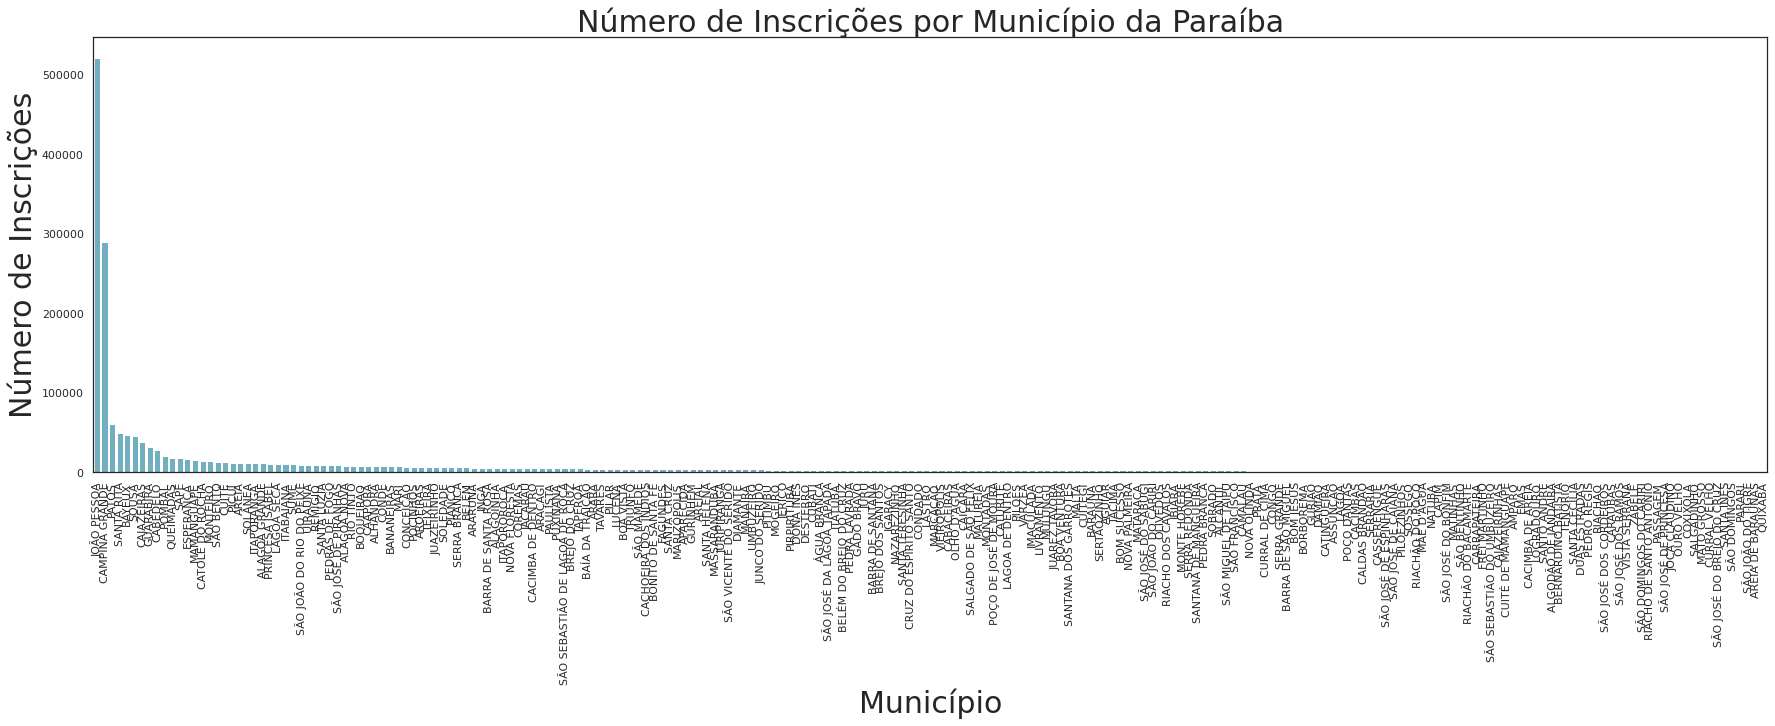

In [ ]:
#@title
sns.set_style("white")
plt.subplots(figsize=(30,8))
sns.barplot(x ='NO_MUNICIPIO_RESIDENCIA', y ='NU_INSCRICAO', color="c", data = N_municipio)
plt.xticks(rotation=90)
plt.title("Número de Inscrições por Município da Paraíba", fontsize=30)
plt.xlabel("Município", fontsize=30)
plt.ylabel("Número de Inscrições", fontsize=30);


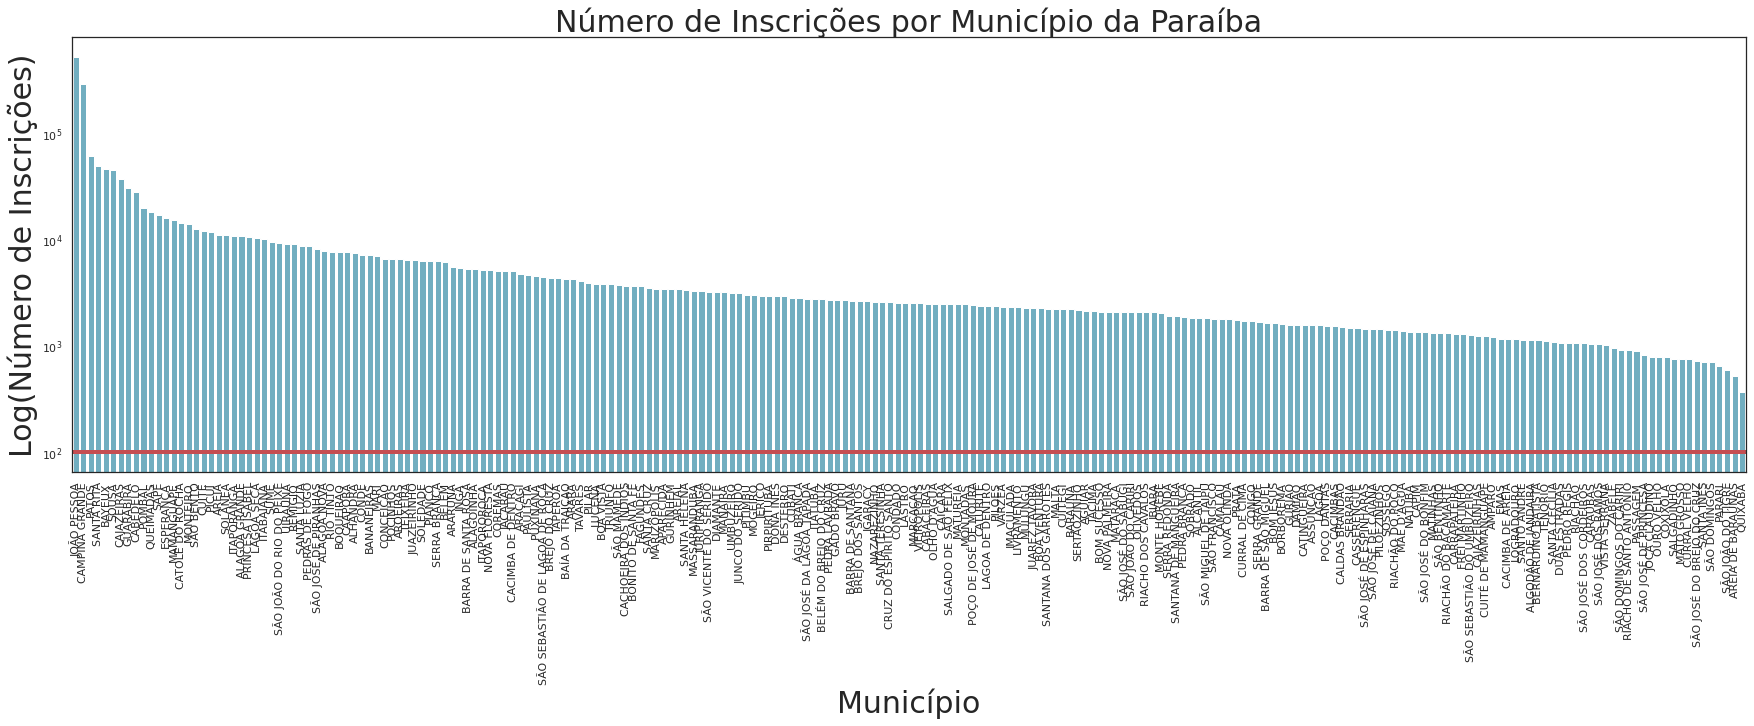

In [ ]:
#@title
sns.set_style("white")
plt.subplots(figsize=(30,8))
sns.barplot(x = 'NO_MUNICIPIO_RESIDENCIA', y = 'NU_INSCRICAO', color="c", data = N_municipio)
plt.yscale("log")
plt.xticks(rotation=90)
plt.axhline(y=100, color = 'r', ls = '-', linewidth=4)
plt.title("Número de Inscrições por Município da Paraíba", fontsize=30)
plt.xlabel("Município", fontsize=30)
plt.ylabel("Log(Número de Inscrições)", fontsize=30);

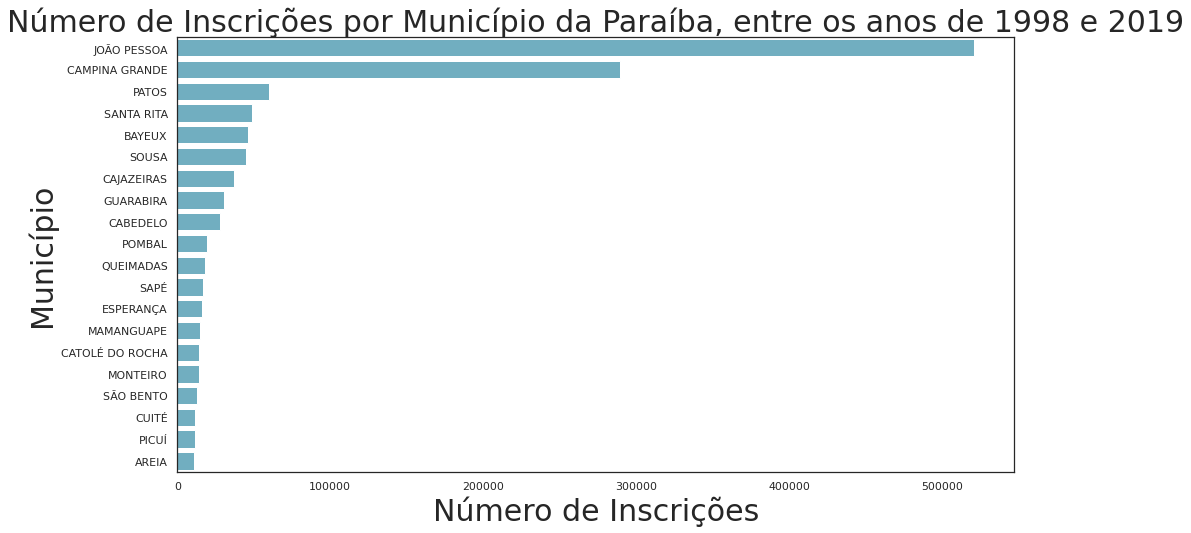

In [ ]:
#@title
# eu fiz esa visualiação pra tu julgar se fica melhor de ver as mais relevantes

mais_inscritos = N_municipio.head(20)
sns.set_style("white")
plt.subplots(figsize=(15,8))
sns.barplot(y ='NO_MUNICIPIO_RESIDENCIA', x ='NU_INSCRICAO', color="c", data = mais_inscritos)
plt.title("Número de Inscrições por Município da Paraíba, entre os anos de 1998 e 2019", fontsize=30)
plt.ylabel("Município", fontsize=30)
plt.xlabel("Número de Inscrições", fontsize=30);

In [ ]:
#@title
N_municipio_ano=dfEnem.groupby(by=['NO_MUNICIPIO_RESIDENCIA', 'NU_ANO'], as_index=False)['NU_INSCRICAO'].count()
N_municipio_ano.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)
N_municipio_ano['Porcentagem']=N_municipio_ano['NU_INSCRICAO']/N_municipio_ano['NU_INSCRICAO'].sum()*100
# N_municipio_ano

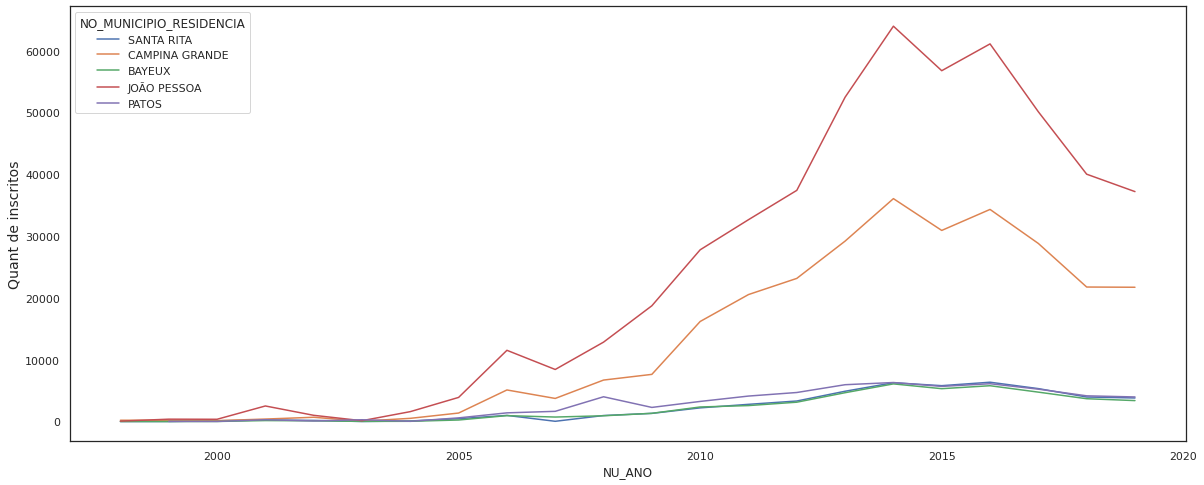

In [ ]:
n = 5
plot_maiores = N_municipio_ano[N_municipio_ano['NO_MUNICIPIO_RESIDENCIA'].isin(mais_inscritos.head(n).NO_MUNICIPIO_RESIDENCIA.tolist())].sort_values(by='NU_ANO')
# display(plot_maiores)

plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
sns.lineplot(data=plot_maiores, x="NU_ANO", y="NU_INSCRICAO", hue="NO_MUNICIPIO_RESIDENCIA")
plt.ylabel('Quant de inscritos', fontsize=14);

In [ ]:
fig = px.line(plot_maiores, x="NU_ANO", y="NU_INSCRICAO", color="NO_MUNICIPIO_RESIDENCIA", title='Mesmo gráfico de cima, mas na biblioteca Plotly',width=1600, height=750)
fig.show()

In [ ]:
sexo_por_anos = dfEnem.groupby(by=['NU_ANO', 'TP_SEXO'])['NU_INSCRICAO'].count().reset_index()
sexo_por_anos.rename(columns = {'NU_INSCRICAO':'INSCRITOS'}, inplace = True)
sexo_por_anos.sample(10)

,NU_ANO,TP_SEXO,INSCRITOS
29,2012,M,57490
4,2000,F,358
36,2016,F,126773
3,1999,M,283
38,2017,F,108680
31,2013,M,77707
1,1998,M,122
10,2003,F,1274
19,2007,M,12717
9,2002,M,1615


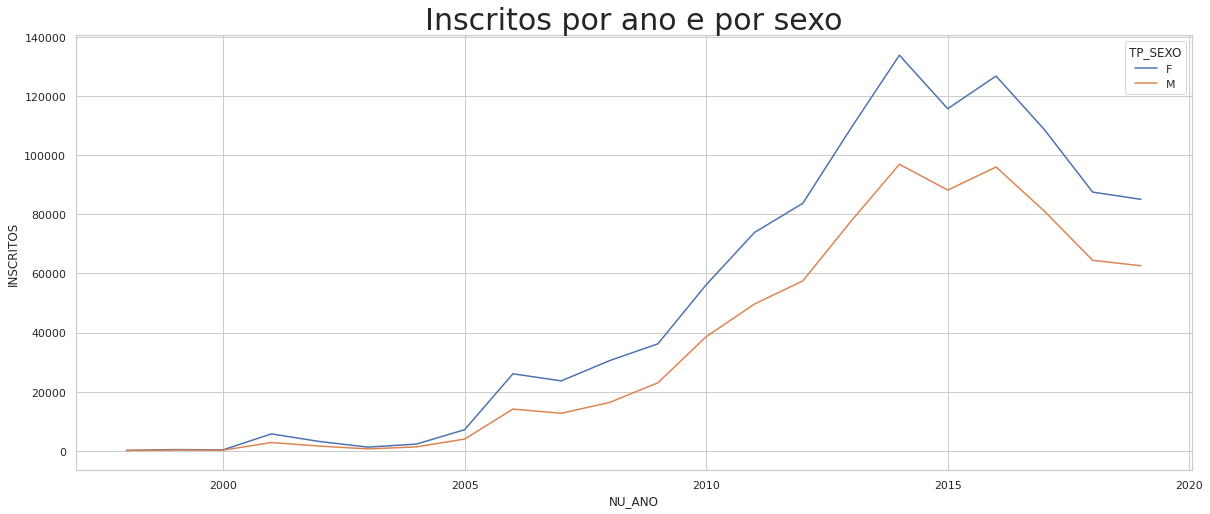

In [ ]:
analise_por_anos_sexo = sexo_por_anos.groupby(by=['NU_ANO', 'TP_SEXO']).sum()

plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
sns.lineplot(data=analise_por_anos_sexo, x="NU_ANO", y="INSCRITOS", hue="TP_SEXO")
plt.title("Inscritos por ano e por sexo", fontsize=30);

In [ ]:
raça_por_anos = dfEnem.groupby(by=['NU_ANO', 'TP_COR_RACA'])['NU_INSCRICAO'].count().reset_index()
raça_por_anos.rename(columns = {'NU_INSCRICAO':'INSCRITOS'}, inplace = True)

In [ ]:
dfEnem.TP_COR_RACA.unique()

array(['Parda', 'Branca', 'Não declarado', 'Preta', 'Amarela', 'Indígena',
       nan, 'NI'], dtype=object)

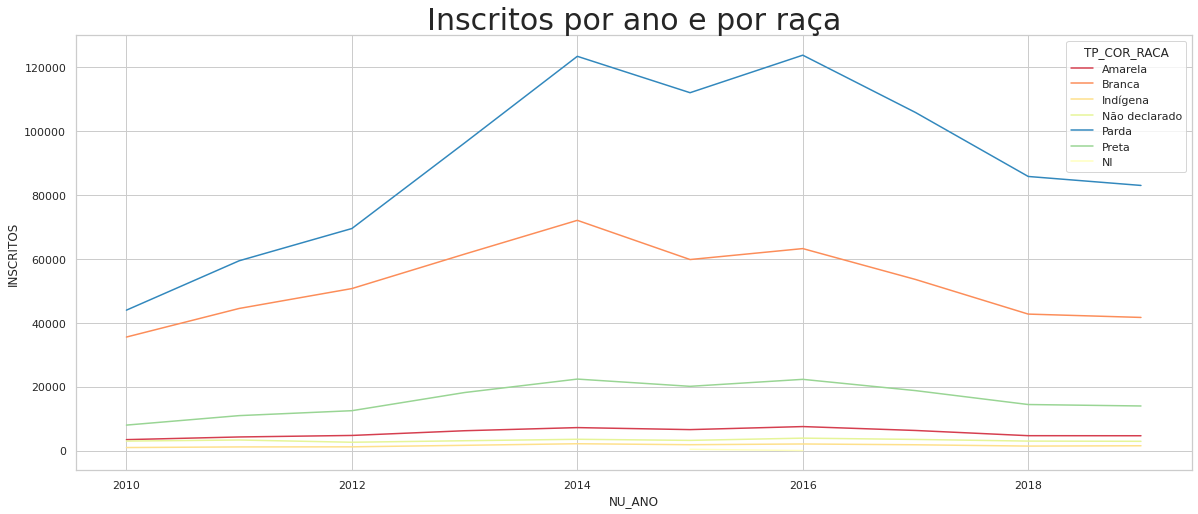

In [ ]:
plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.lineplot(data=raça_por_anos, x="NU_ANO", y="INSCRITOS", hue="TP_COR_RACA", palette=['#d53e4f','#fc8d59','#fee08b','#e6f598','#3288bd','#99d594','#ffffbf'])
plt.title("Inscritos por ano e por raça", fontsize=30);

In [ ]:
dfEnem.TP_DEPENDENCIA_ADM_ESC.replace({1:'Federal','1.0':'Federal','1':'Federal',
                                       2:'Estadual','2.0':'Estadual','2':'Estadual',
                                       3:'Municipal','3.0':'Municipal','3':'Municipal',
                                       4:'Privada', '4.0':'Privada','4':'Privada',
                                       ' ':'NaN'},
                                      inplace=True)
dfEnem.replace('NaN', np.nan, inplace=True)
DepEsc_por_anos = dfEnem.groupby(by=['NU_ANO', 'TP_DEPENDENCIA_ADM_ESC'])['NU_INSCRICAO'].count().reset_index()
DepEsc_por_anos.rename(columns = {'NU_INSCRICAO':'INSCRITOS'}, inplace = True)



In [ ]:
DepEsc_por_anos.TP_DEPENDENCIA_ADM_ESC.unique()

array(['Estadual', 'Federal', 'Municipal', 'Privada'], dtype=object)

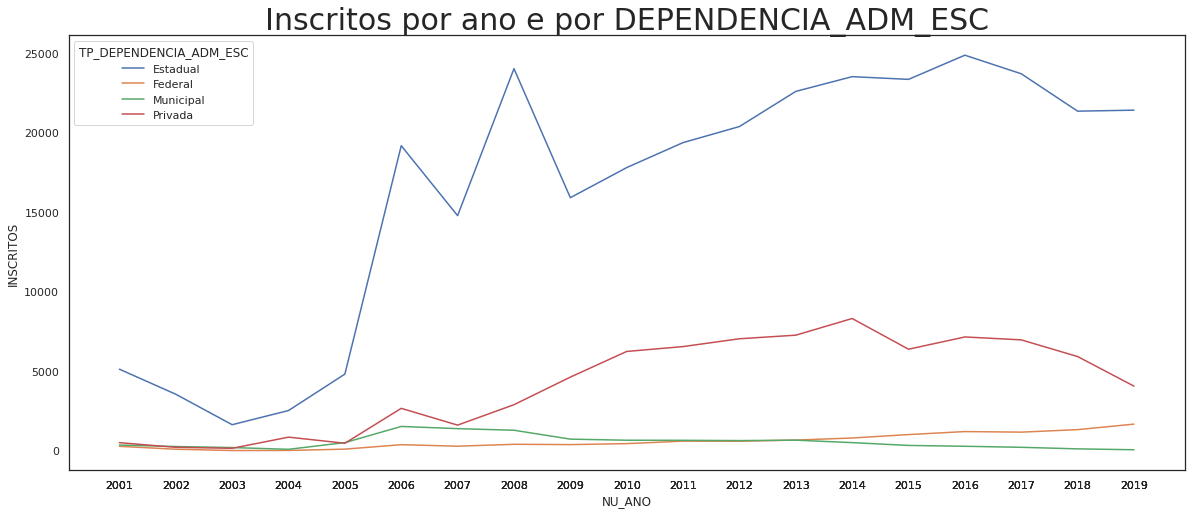

In [ ]:
plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
sns.lineplot(data=DepEsc_por_anos, x="NU_ANO", y="INSCRITOS", hue="TP_DEPENDENCIA_ADM_ESC")
plt.xticks(DepEsc_por_anos.NU_ANO)
plt.title("Inscritos por ano e por DEPENDENCIA_ADM_ESC", fontsize=30);

In [ ]:
df_Escolaridade_Mae = dfEnem.groupby(by=['NU_ANO', 'Escolaridade_Mae'])['NU_INSCRICAO'].count().reset_index()
df_Escolaridade_Mae

,NU_ANO,Escolaridade_Mae,NU_INSCRICAO
0,1998,Ensino Médio Completo,38
1,1998,Ensino Médio Incompleto,15
2,1998,Fundamental Completo,8
3,1998,Fundamental Incompleto,18
4,1998,Pós-Graduação,29
...,...,...,...
164,2019,Fundamental Completo,22142
165,2019,Fundamental Incompleto,33559
166,2019,Pós-Graduação,9240
167,2019,Sem Estudo,8280


In [ ]:
dfEnem.Escolaridade_Mae.unique()

array(['Pós-Graduação', 'Ensino Médio Completo', 'Fundamental Completo',
       'Ensino Médio Incompleto', 'Superior Completo',
       'Fundamental Incompleto', nan, 'Sem Estudo', 'Superior Incompleto'],
      dtype=object)

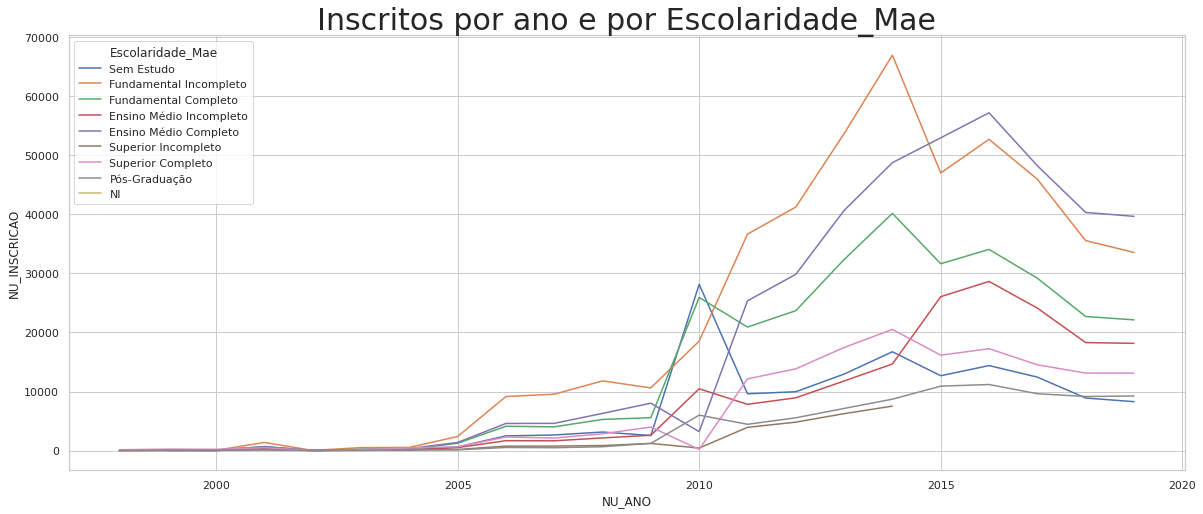

In [ ]:
plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
hue_order = ['Sem Estudo', 'Fundamental Incompleto', 'Fundamental Completo', 'Ensino Médio Incompleto', 'Ensino Médio Completo', 'Superior Incompleto', 'Superior Completo', 'Pós-Graduação', 'NI']
sns.lineplot(data=df_Escolaridade_Mae, x="NU_ANO", y="NU_INSCRICAO", hue="Escolaridade_Mae", ci=None, hue_order=hue_order)
plt.title("Inscritos por ano e por Escolaridade_Mae", fontsize=30);

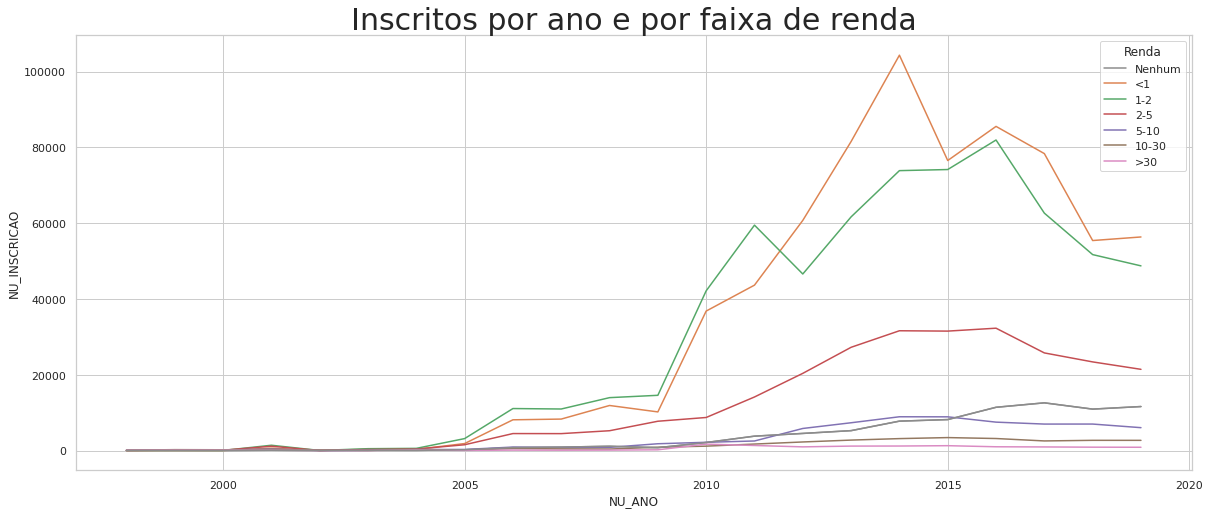

In [ ]:
df_renda = dfEnem.groupby(by=['NU_ANO', 'Renda'])['NU_INSCRICAO'].count().reset_index()

plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
hue_order = ['Nenhum', '<1', '1-2', '2-5', '5-10', '10-30', '>30', 'Nenhum']
sns.lineplot(data=df_renda, x="NU_ANO", y="NU_INSCRICAO", hue="Renda", hue_order=hue_order)
plt.title("Inscritos por ano e por faixa de renda", fontsize=30);

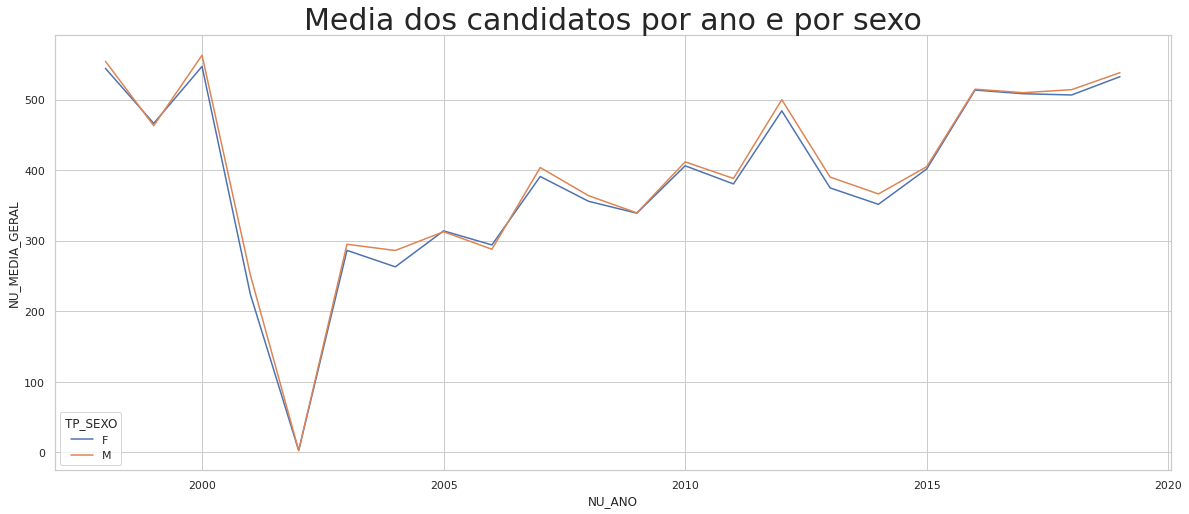

In [ ]:
############################ NÃO SEI SE ESSA INFORMAÇÃO TRAZ MUITO VALOR AGREGADO ############################

df_media_sexo = dfEnem.groupby(by=['NU_ANO', 'TP_SEXO'])['NU_MEDIA_GERAL'].mean().reset_index()

plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
sns.lineplot(data=df_media_sexo, x="NU_ANO", y="NU_MEDIA_GERAL", hue="TP_SEXO")
plt.title("Media dos candidatos por ano e por sexo", fontsize=30);

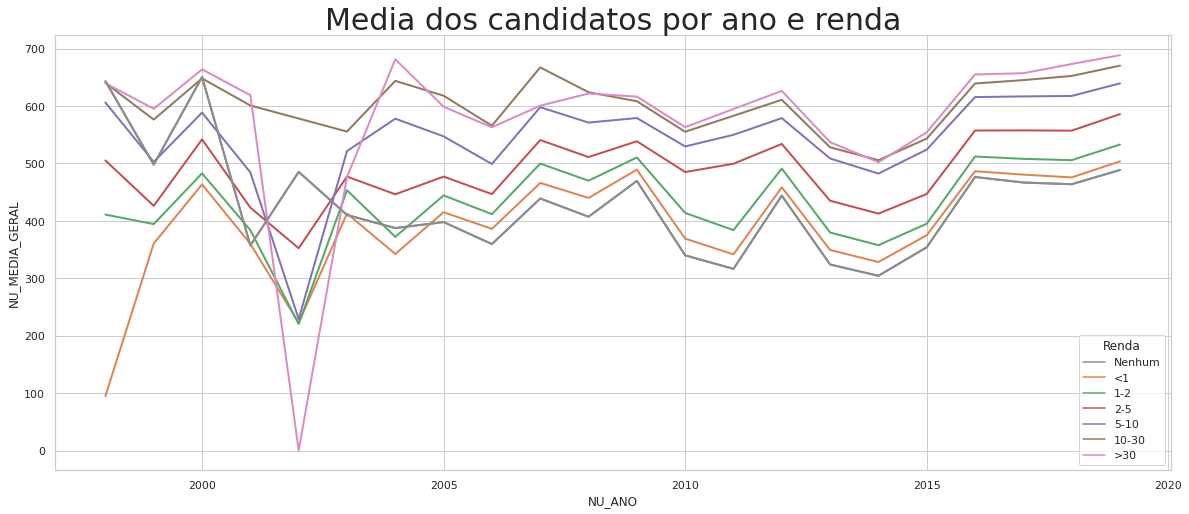

In [ ]:
df_media_renda = dfEnem.groupby(by=['NU_ANO', 'Renda'])['NU_MEDIA_GERAL'].mean().reset_index()

plt.subplots(figsize=(20,8))
sns.set_style("white")
hue_order = ['Nenhum', '<1', '1-2', '2-5', '5-10', '10-30', '>30', 'Nenhum']
sns.lineplot(data=df_media_renda, x="NU_ANO", y="NU_MEDIA_GERAL", hue="Renda", hue_order=hue_order, linewidth = 2)
plt.title("Media dos candidatos por ano e renda", fontsize=30);

In [ ]:
def grafico_temporal(data, y, hue, hue_order='None'):
    sns.lineplot(data, x="NU_ANO", y=y, hue=hue, linewidth=2, hue_order=hue_order)
    plt.title(f"Media dos candidatos por ano e {hue}", fontsize=30);

In [ ]:
grafico_temporal(df_media_renda, ['NU_MEDIA_GERAL'], ['TP_COR_RACA'])

ValueError: ignored

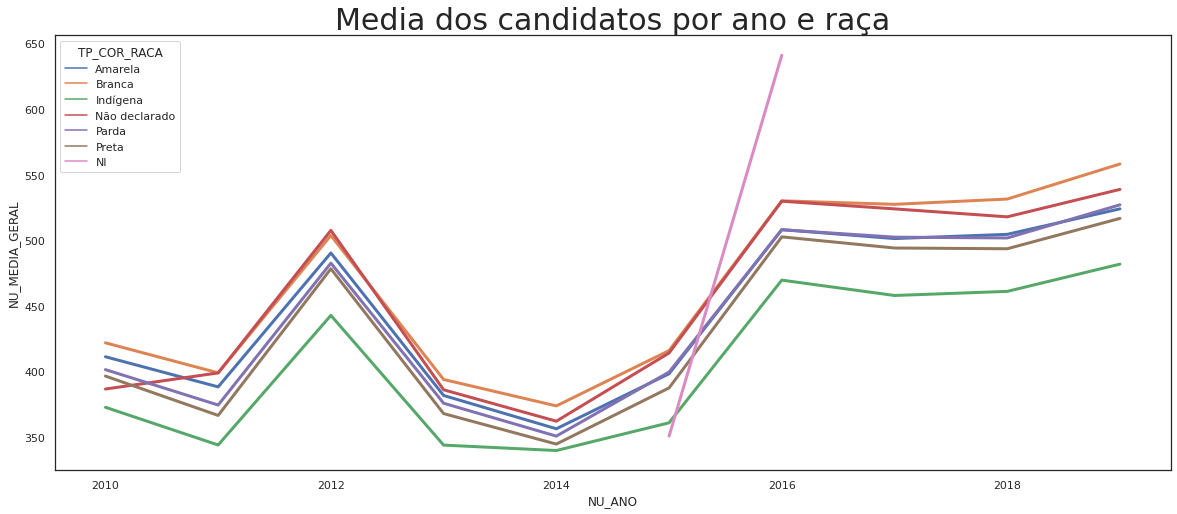

In [ ]:
df_media_renda = dfEnem.groupby(by=['NU_ANO', 'TP_COR_RACA'])['NU_MEDIA_GERAL'].mean().reset_index()

plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.lineplot(data=df_media_renda, x="NU_ANO", y="NU_MEDIA_GERAL", hue="TP_COR_RACA", linewidth = 3)
plt.title("Media dos candidatos por ano e raça", fontsize=30);

In [ ]:
dfEnem.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_PRESENCA', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Escolaridade_Pai',
       'Escolaridade_Mae', 'NPessoas', 'Renda', 'Celular', 'Computador',
       'Internet', 'NU_NOTA_OBJETIVA', 'NU_MEDIA_GERAL'],
      dtype='object')

Text(0.5, 1.0, 'Inscritos por ano e por faixa de renda')

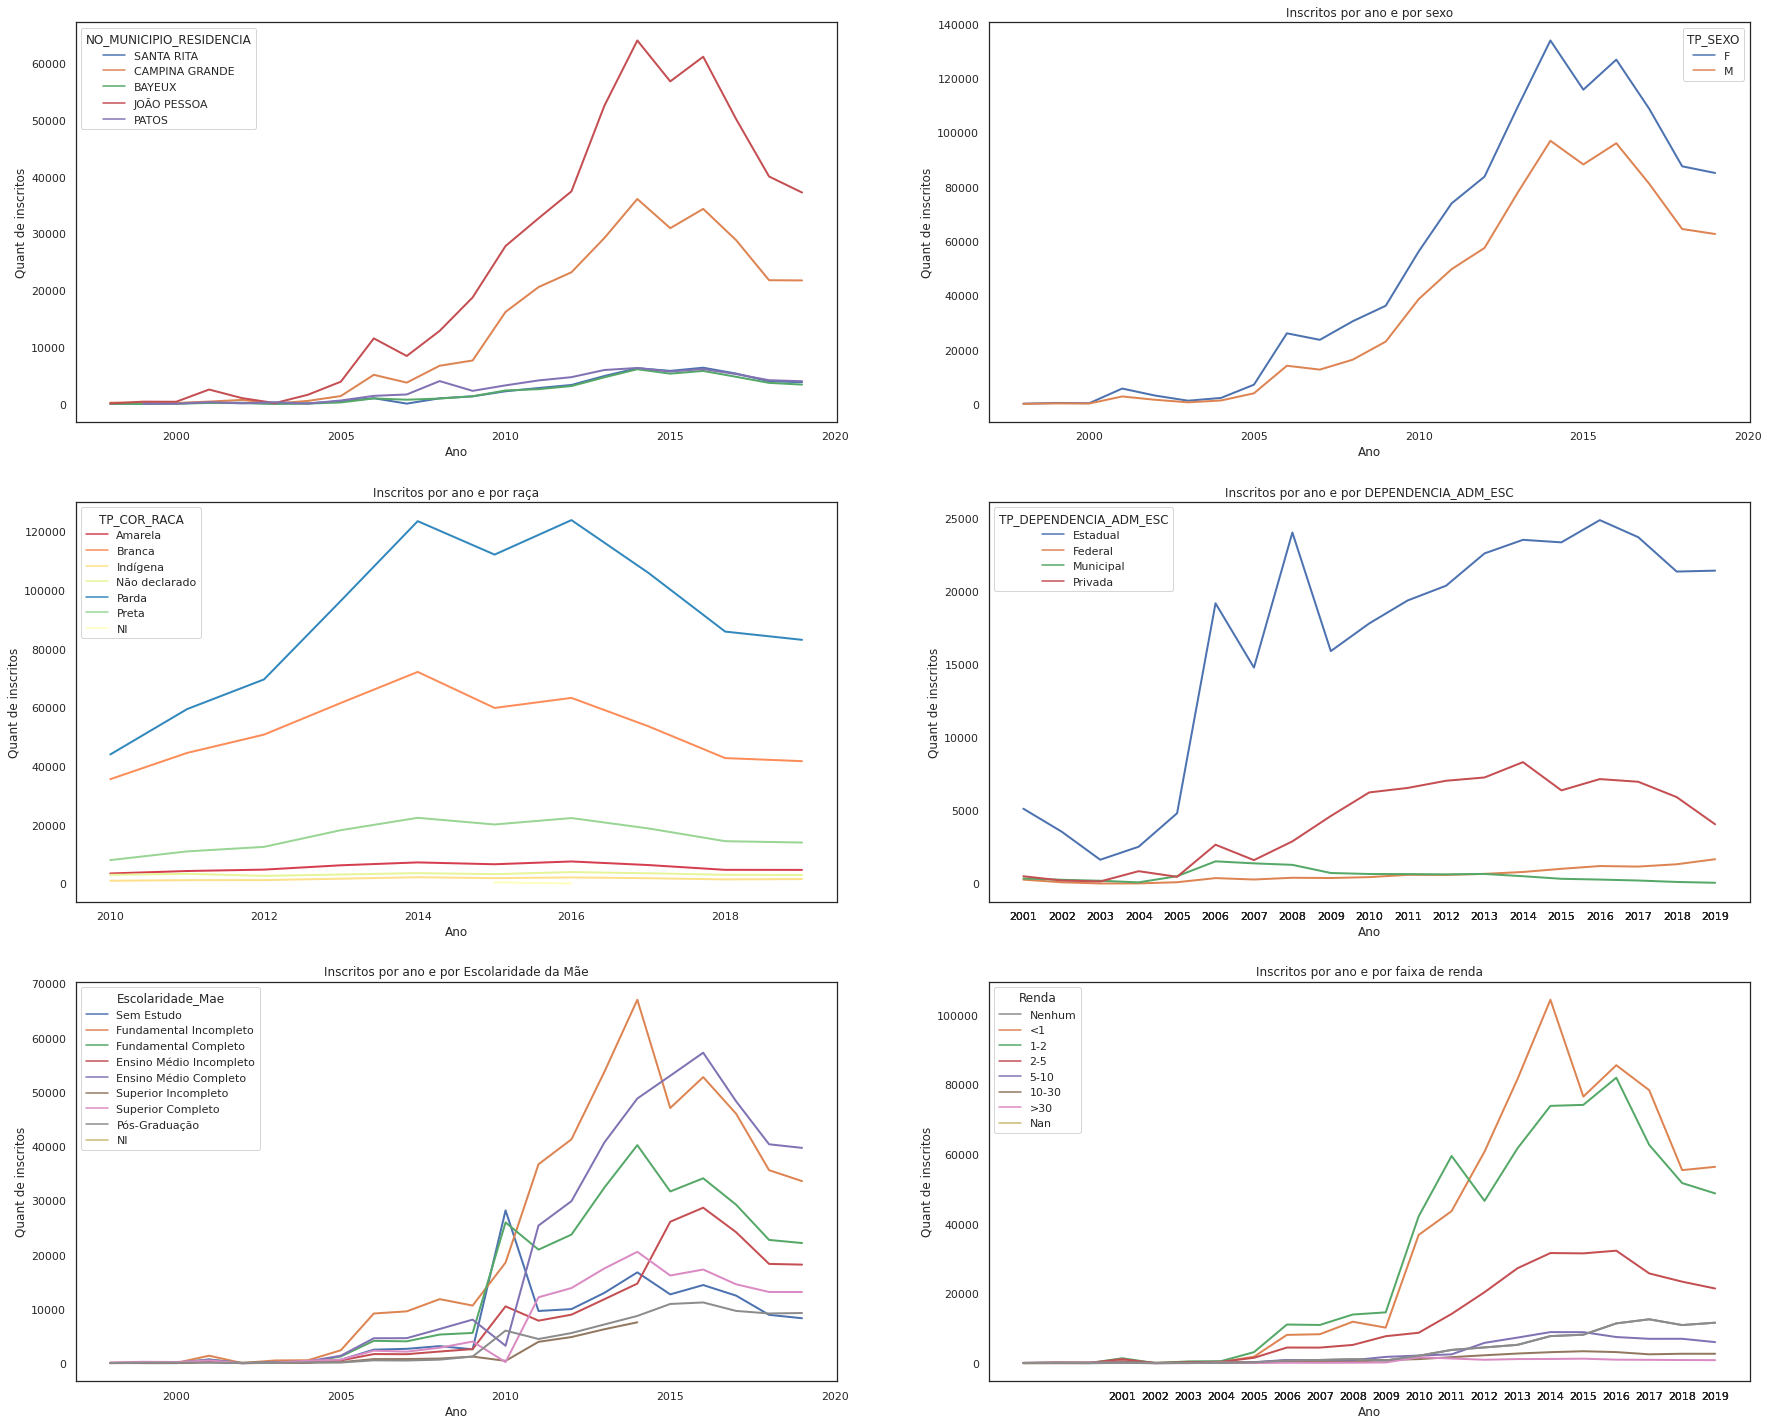

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(30, 25))

sns.set_style("whitegrid")
sns.lineplot(ax=axes[0, 0], data=plot_maiores, x="NU_ANO", y="NU_INSCRICAO", hue="NO_MUNICIPIO_RESIDENCIA", linewidth = 2)
axes[0,0].set_ylabel('Quant de inscritos')
axes[0,0].set_xlabel('Ano')

sns.lineplot(ax=axes[0, 1], data=analise_por_anos_sexo, x="NU_ANO", y="INSCRITOS", hue="TP_SEXO", linewidth = 2)
axes[0,1].set_ylabel('Quant de inscritos')
axes[0,1].set_xlabel('Ano')
axes[0,1].set_title('Inscritos por ano e por sexo')

sns.lineplot(ax=axes[1, 0], data=raça_por_anos, x="NU_ANO", y="INSCRITOS", hue="TP_COR_RACA", 
             palette=['#d53e4f','#fc8d59','#fee08b','#e6f598','#3288bd','#99d594','#ffffbf'], linewidth = 2)
axes[1,0].set_ylabel('Quant de inscritos')
axes[1,0].set_xlabel('Ano')
axes[1,0].set_title('Inscritos por ano e por raça')

sns.lineplot(ax=axes[1, 1], data=DepEsc_por_anos, x="NU_ANO", y="INSCRITOS", hue="TP_DEPENDENCIA_ADM_ESC", linewidth = 2)
axes[1,1].set_xticks(DepEsc_por_anos.NU_ANO)
axes[1,1].set_ylabel('Quant de inscritos')
axes[1,1].set_xlabel('Ano')
axes[1,1].set_title('Inscritos por ano e por DEPENDENCIA_ADM_ESC')

hue_order = ['Sem Estudo', 'Fundamental Incompleto', 'Fundamental Completo', 'Ensino Médio Incompleto', 
             'Ensino Médio Completo', 'Superior Incompleto', 'Superior Completo', 'Pós-Graduação', 'NI']
sns.lineplot(ax=axes[2, 0], data=df_Escolaridade_Mae, x="NU_ANO", y="NU_INSCRICAO", 
             hue="Escolaridade_Mae", ci=None, hue_order=hue_order, linewidth = 2)
axes[2,0].set_ylabel('Quant de inscritos')
axes[2,0].set_xlabel('Ano')
axes[2,0].set_title('Inscritos por ano e por Escolaridade da Mãe')

hue_order = ['Nenhum', '<1', '1-2', '2-5', '5-10', '10-30', '>30', 'Nenhum', 'Nan']
sns.lineplot(ax=axes[2, 1], data=df_renda, x="NU_ANO", y="NU_INSCRICAO", hue="Renda", hue_order=hue_order, linewidth = 2)
axes[2,1].set_xticks(DepEsc_por_anos.NU_ANO)
axes[2,1].set_ylabel('Quant de inscritos')
axes[2,1].set_xlabel('Ano')
axes[2,1].set_title('Inscritos por ano e por faixa de renda')

# sns.set_style("white")
# hue_order = ['Nenhum', '<1', '1-2', '2-5', '5-10', '10-30', '>30', 'Nenhum']
# sns.lineplot(data=df_media_renda, x="NU_ANO", y="NU_MEDIA_GERAL", hue="Renda", hue_order=hue_order, linewidth = 2)
# plt.title("Media dos candidatos por ano e renda", fontsize=30);

##**População estimada da Paraíba**

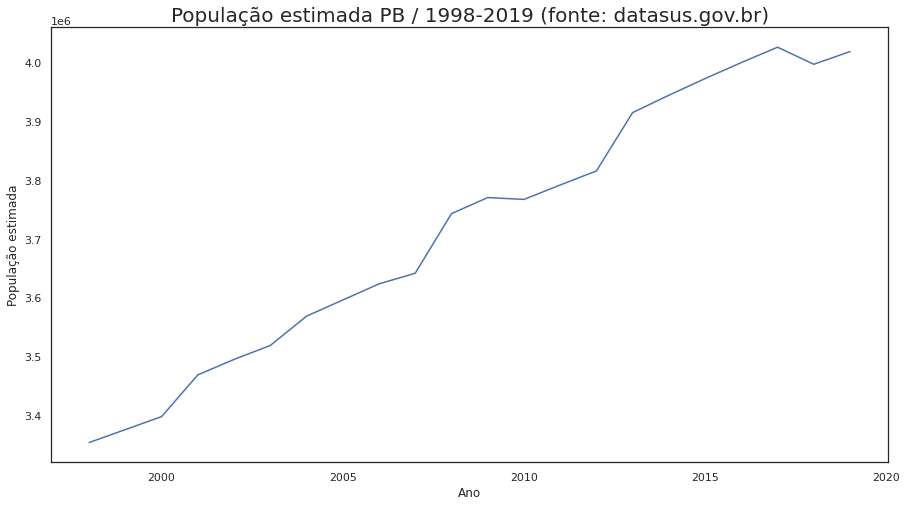

In [ ]:
pop_PB = pd.read_csv('https://raw.githubusercontent.com/mariaeco/Projeto_IntroducaoCienciasdeDados_UFPB/main/DADOS/pop_PB.csv', sep=';', encoding="latin-1")
pop_PB.drop([0,1,2,4], inplace=True)
pop_PB.rename(columns={'Macrorregião de Saúde':'População da Paraíba'}, inplace=True)
pop_PB = pop_PB.T.reset_index()
pop_PB.columns = pop_PB.iloc[0]
pop_PB = pop_PB[1:]
pop_PB['População da Paraíba'] = pd.to_numeric(pop_PB['População da Paraíba'])
pop_PB['Total'] = pd.to_numeric(pop_PB['Total'])
# pop_PB.dtypes

plt.figure(figsize=(15,8))
sns.lineplot(data=pop_PB, x='População da Paraíba', y='Total')
plt.xlabel('Ano')
plt.ylabel('População estimada')
plt.title('População estimada PB / 1998-2019 (fonte: datasus.gov.br)', fontsize=20);
# http://tabnet.datasus.gov.br/cgi/deftohtm.exe?ibge/cnv/poptpb.def
# http://tabnet.datasus.gov.br/cgi/deftohtm.exe?ibge/cnv/poppb.def  <- nesse daria pra obter a população por sexo, mas os dados só vão até 2012

## População da PB Por Sexo

In [ ]:
pop_PB_Sexo = pd.read_csv('https://raw.githubusercontent.com/mariaeco/Projeto_IntroducaoCienciasdeDados_UFPB/main/DADOS/PopPB_sexo_1998_2012.csv', sep=',', encoding="latin-1")
pop_PB_Sexo.head(5)

,Ano,Sexo,Populacao
0,2012,M,1847730
1,2012,F,1967440
2,2011,M,1836088
3,2011,F,1955277
4,2010,M,1824379


Text(0, 0.5, 'População estimada')

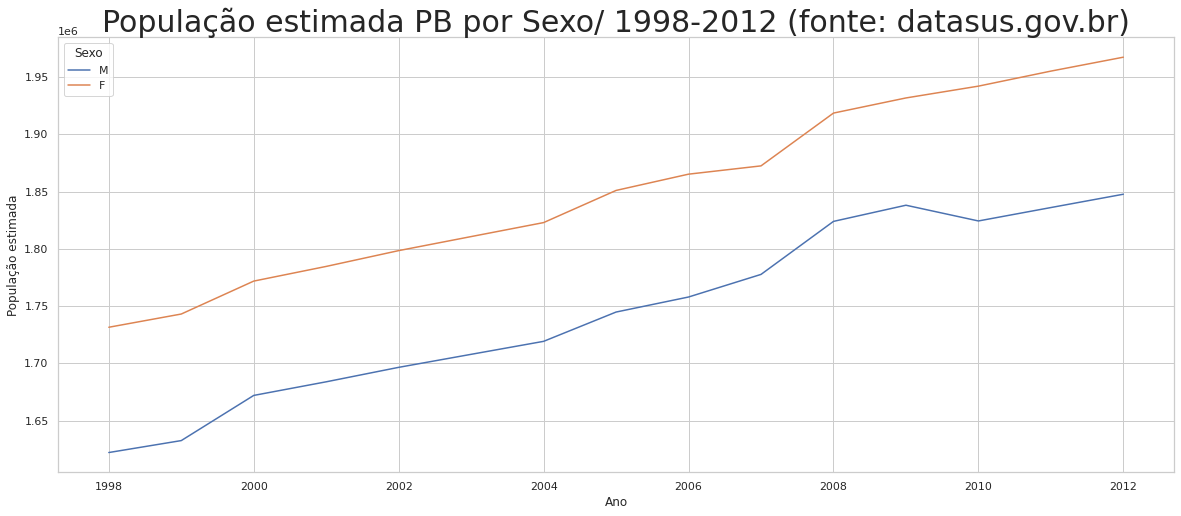

In [ ]:
plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
sns.lineplot(data=pop_PB_Sexo, x="Ano", y="Populacao", hue="Sexo")
plt.title("População estimada PB por Sexo/ 1998-2012 (fonte: datasus.gov.br)", fontsize=30);
plt.xlabel('Ano')
plt.ylabel('População estimada')

#**ANÁLISES POR BOXPLOTS**

## **Relação entre a nota do Enem e o Tipo de Admnistração da Escola (Federal, Estadual, Municipal, Privada)**


In [ ]:
#@title
dfEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'CO_ESCOLA',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_PRESENCA',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Escolaridade_Pai', 'Escolaridade_Mae',
       'NPessoas', 'Renda', 'Celular', 'Computador', 'Internet',
       'NU_NOTA_OBJETIVA', 'NU_MEDIA_GERAL'], dtype=object)

In [ ]:
#@title
vars =['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'TP_COR_RACA',
       'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC',
       'Escolaridade_Pai', 'Escolaridade_Mae', 'NPessoas', 'Renda',
       'Celular', 'Computador', 'Internet']
dfEnemMELT = pd.melt(dfEnem, id_vars=vars, value_vars=['NU_NOTA_OBJETIVA','NU_NOTA_CN',	
                                                       'NU_NOTA_CH','NU_NOTA_LC',
                                                       'NU_NOTA_MT','NU_NOTA_REDACAO'] )
dfEnemMELT.rename(columns={'value': 'Nota', 'variable':'Prova'}, inplace=True)
dfEnemMELT.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_COR_RACA,CO_ESCOLA,CO_MUNICIPIO_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,Escolaridade_Pai,Escolaridade_Mae,NPessoas,Renda,Celular,Computador,Internet,Prova,Nota
0,190001037515,2019,2507507.0,JOÃO PESSOA,PB,Parda,NaN,NaN,NaN,NaN,Pós-Graduação,Pós-Graduação,1.0,>30,1.0,1.0,1.0,NU_NOTA_OBJETIVA,NaN
1,190001125426,2019,2504009.0,CAMPINA GRANDE,PB,Branca,NaN,NaN,NaN,NaN,Fundamental Incompleto,Ensino Médio Completo,4.0,<1,1.0,0.0,1.0,NU_NOTA_OBJETIVA,NaN
2,190001141066,2019,2516607.0,TAVARES,PB,Parda,NaN,NaN,NaN,NaN,Ensino Médio Completo,Pós-Graduação,4.0,2-5,1.0,1.0,1.0,NU_NOTA_OBJETIVA,678.6
3,190001141273,2019,2502409.0,BONITO DE SANTA FÉ,PB,Parda,NaN,NaN,NaN,NaN,Fundamental Incompleto,Fundamental Completo,4.0,1-2,1.0,0.0,1.0,NU_NOTA_OBJETIVA,NaN
4,190001165087,2019,2514503.0,SÃO JOSÉ DE PIRANHAS,PB,Não declarado,NaN,NaN,NaN,NaN,NaN,Ensino Médio Completo,4.0,<1,1.0,0.0,1.0,NU_NOTA_OBJETIVA,NaN


In [ ]:
dfEnemMELT.dtypes

NU_INSCRICAO                 int64
NU_ANO                       int64
CO_MUNICIPIO_RESIDENCIA    float64
NO_MUNICIPIO_RESIDENCIA     object
SG_UF_RESIDENCIA            object
TP_COR_RACA                 object
CO_ESCOLA                  float64
CO_MUNICIPIO_ESC           float64
TP_DEPENDENCIA_ADM_ESC      object
TP_LOCALIZACAO_ESC          object
Escolaridade_Pai            object
Escolaridade_Mae            object
NPessoas                   float64
Renda                       object
Celular                    float64
Computador                 float64
Internet                   float64
Prova                       object
Nota                       float64
dtype: object

In [ ]:
dfEnemMELT.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_ESCOLA,CO_MUNICIPIO_ESC,NPessoas,Celular,Computador,Internet,Nota
count,1.144735e+07,1.144735e+07,1.143067e+07,2.130120e+06,2.464476e+06,1.032068e+07,1.063930e+07,1.097372e+07,1.093854e+07,8.510232e+06
mean,1.773579e+11,2.013916e+03,2.507613e+06,2.755524e+07,2.520523e+06,4.061077e+00,7.986579e-01,5.584454e-01,6.007679e-01,4.791947e+02
std,8.471404e+10,3.533730e+00,4.470295e+03,8.331060e+06,1.815256e+05,1.497022e+00,4.010031e-01,4.965724e-01,4.897406e-01,1.405237e+02
min,3.900000e+01,1.998000e+03,1.400100e+06,1.100006e+07,1.100023e+06,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400045e+11,2.012000e+03,2.504009e+06,2.504506e+07,2.504009e+06,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.246000e+02
50%,1.600065e+11,2.014000e+03,2.507507e+06,2.508444e+07,2.507507e+06,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.880000e+02
75%,1.900037e+11,2.017000e+03,2.510808e+06,2.509926e+07,2.510808e+06,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.569000e+02
max,4.000058e+11,2.019000e+03,3.547809e+06,9.801501e+07,5.300108e+06,2.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.004300e+03


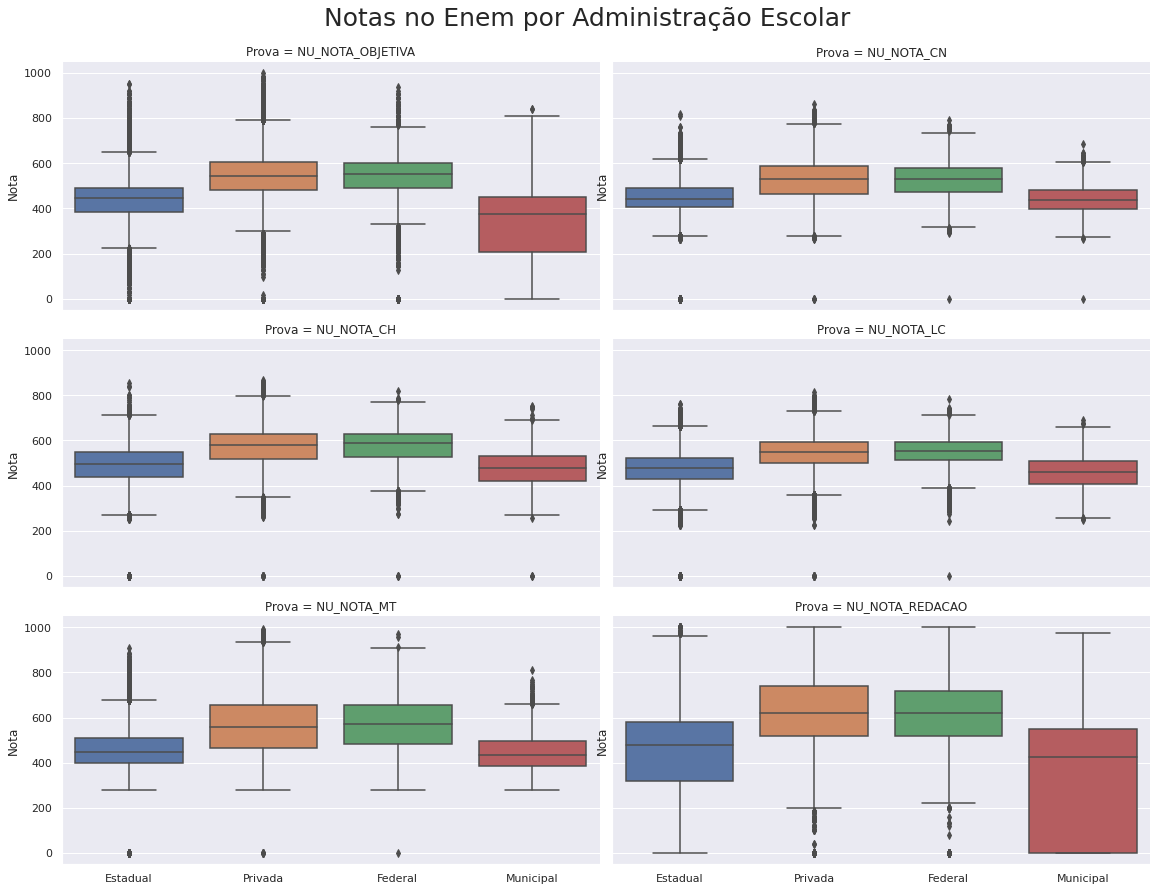

In [ ]:
#@title
sns.set_style("white")
sns.set(font_scale=1)
g = sns.catplot(x="TP_DEPENDENCIA_ADM_ESC", y="Nota", 
                col="Prova",col_wrap=2, 
                kind="box",
                height=4, aspect=2, data=dfEnemMELT);

g.fig.suptitle("Notas no Enem por Administração Escolar",y=1.03, fontsize=25)
g.set(ylabel="Nota", xlabel="")
# g.set_xticklabels(['Federal', 'Estadual', 'Municipal','Privada']) <- eu comentei essa linha porque achei estranho o desempenho 
#                                                                      das pariculares(últimas, em vermeho, serem tão ruins). Qdo alterei
#                                                                      a ordem foi modificada e ficou o original do dataset
plt.show()

##**Nota por Raça/Cor**
Análise por Boxplot

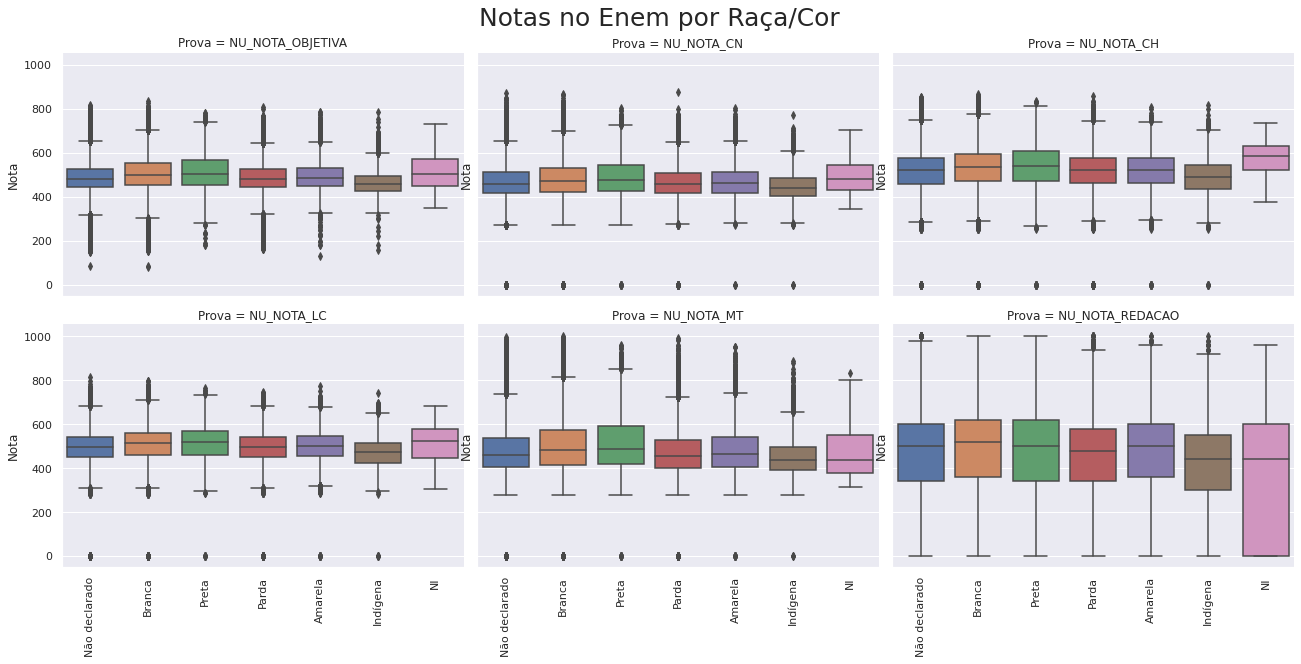

In [ ]:
#@title
sns.set_style("white")
sns.set(font_scale=1)
g = sns.catplot(x="TP_COR_RACA", y="Nota", 
                col="Prova",col_wrap=3, 
                data=dfEnemMELT, kind="box",
                height=4, aspect=1.5);
g.fig.suptitle("Notas no Enem por Raça/Cor",y=1.03, fontsize=25)
g.set(ylabel="Nota", xlabel="")
g.set_xticklabels(['Não declarado', 'Branca', 'Preta','Parda','Amarela','Indígena','NI'], rotation=90)

plt.show()




#**ANÁLISES POR HISTOGRAMAS**

##**Distribuição das Nota do Enem na Paraíba por tipo de escola**

In [ ]:
#@title
dfEnem['TP_ESCOLA'] = dfEnem['TP_ESCOLA'].astype(str)
dfEnem['TP_ESCOLA'] = dfEnem['TP_ESCOLA'].replace({'1': 'Não Informado','2':'Pública','3':'Privada'})
dfEnem['TP_ESCOLA']

In [ ]:
#@title
# histograma da nota média dos candidadtos, excluindo as notas zero
sns.set(style='whitegrid',font_scale=2,color_codes=True);
sns.set_palette("tab10")

g=sns.displot(dfEnem, hue='TP_ESCOLA', 
                x ="NOTA_MEDIA", height=8, aspect=2,bins=200, hue_order=['Privada', 'Pública','Não Informado'],
              alpha=0.5, kde=True)
g.fig.suptitle("Distribuição das Notas por Tipo de Escola",y=1.03);
g.set(ylabel="Contagem das notas", xlabel="Nota");


Uma grande quantidade de valores nos quais  não foi informado o tipo de Escola

##**Distribuição das Nota do Enem na Paraíba por Localização de escola**

In [ ]:
#@title

dfEnem['TP_LOCALIZACAO_ESC'] = dfEnem['TP_LOCALIZACAO_ESC'].replace({1: 'Urbana',2:'Rural'})

# histograma da nota média dos candidadtos, excluindo as notas zero
sns.set(style='whitegrid',font_scale=2,color_codes=True);
sns.set_palette("tab10")

g=sns.displot(dfEnem, hue='TP_LOCALIZACAO_ESC', 
                x ="NOTA_MEDIA", height=8, aspect=2,bins=200, hue_order=['Rural', 'Urbana'],
              alpha=0.5, kde=True)
g.fig.suptitle("Distribuição das Notas por Tipo de Escola",y=1.03);
g.set(ylabel="Contagem das notas", xlabel="Nota");

#**ANÁLISES POR SCATTERPLOTS**





##**Gráficos das Relações da Nota Média com  Aspectos Socio-Econômicos**

### *Nota no Enem x Número de Pessoas na Família*

In [ ]:
#@title
g = sns.scatterplot(data=dfEnem, x='Q005', y="NOTA_MEDIA")
g.set(ylabel="Nota no Enem", xlabel="Número de pessoas na família");

ValueError: ignored

Há uma dispersão grande no dado de Número de pessoas por família, vamos ver se há uma relação com o tipo de Escola em que Estuda, e a renda

In [ ]:
#@title
g = sns.scatterplot(data=dfEnem, x='Q005', y="NOTA_MEDIA", hue="TP_ESCOLA")
g.set(ylabel="Nota no Enem", xlabel="Número de pessoas na família");

ValueError: ignored

Continua sem dar nenhuma explicação, talvez devido a quantidade de NIs.

In [ ]:
#@title
ordem = ['A','B','C','D','E','F','G','H','I','J','L','K','M','N','O','P','Q']
g = sns.scatterplot(data=dfEnem, x='Q005', y="NOTA_MEDIA", hue="Q006", hue_order=ordem)
g.set(ylabel="Nota no Enem", xlabel="Número de pessoas na família");
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

Um pouco mais claro aqui o resultado.
Converter depois a renda em inteiro (o ponto médio da renda)

#**OUTROS BOXPLOTS**

### *Nota no Enem x Renda Familiar*

In [ ]:
#@title
sns.set_style("white")
ordem = ['A','B','C','D','E','F','G','H','I','J','L','K','M','N','O','P','Q']
sns.set(font_scale=1)
g = sns.catplot(x="Q006", y="NOTA_MEDIA", #hue = dose
                data=dfEnem, kind="box",
                height=4, aspect=1.5,
                order=ordem);

g.fig.suptitle("Notas no Enem por Renda",y=1.1, fontsize=25)
g.set(ylabel="Nota", xlabel="", title="A(Renda mais baixa) --> Q(Renda mais alta)")
plt.show()

##*Escolaridade dos Pais*

In [ ]:
#@title
sns.set_style("white")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 10))

ordem = ['A','B','C','D','E','F','G','H']
sns.set(font_scale=2)

sns.boxplot(ax=ax1,x="Q001", y="NOTA_MEDIA", data=dfEnem, order=ordem);
ax1.set(ylabel="Nota", xlabel="Escolaridade do Pai", title="A(mais baixa) --> H(mais alta)")
#handles, _ = ax1.get_legend_handles_labels()          # Get the artists.
ax1.legend(labels=['A=Não Estudou', 'B=Fund.I completo','C=Fund. II completo',
                           'D=E. Medio Completo', 'E=Graduação Completa','F=Pós-graduação Completa',
                           'G=Não sabe'],bbox_to_anchor=(1.05, 1), borderaxespad=0,fontsize=20)


sns.boxplot(ax=ax2, x="Q001", y="NOTA_MEDIA", data=dfEnem, order=ordem);
ax2.set(ylabel="Nota", xlabel="Escolaridade da Mãe")


plt.show()

Muitos estudandes não sabem a escolaridade dos pais.
Entretanto, pela nota do enem, talvez seja possível estimar que os pais não sejam escolarizados.
Qual a origem dos pais? São de zona rural? qual a profissão?
Aprofundar mais tarde.

## *ACESSO A TECNOLOGIAS*




In [ ]:
#@title
sns.set_style("white")
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 10))

sns.set(font_scale=2)

sns.boxplot(ax=ax1,x="Q023", y="NOTA_MEDIA", data=dfEnem);
ax1.set(ylabel="Nota", xlabel="", title="Possui Celular?")
ax1.set_xticks([0,1]) 
ax1.set_xticklabels(['Não', "Sim"], fontsize=20)

#handles, _ = ax1.get_legend_handles_labels()          # Get the artists.
#ax1.legend(labels=['A=Não Estudou', 'B=Fund.I completo','C=Fund. II completo',
 #                          'D=E. Medio Completo', 'E=Graduação Completa','F=Pós-graduação Completa',
 #                          'G=Não sabe'],bbox_to_anchor=(1.05, 1), borderaxespad=0,fontsize=20)

sns.boxplot(ax=ax2,x="Q024", y="NOTA_MEDIA", data=dfEnem);
ax2.set(ylabel="", xlabel="", title="Possui Computador? Quantos?")
ax2.set_xticks([0,1,2,3,4]) 
ax2.set_xticklabels(['Não', '1',"2","3","4"], fontsize=20)


ordem = ['A','B']
sns.boxplot(ax=ax3,x="Q025", y="NOTA_MEDIA", data=dfEnem, order=ordem);
ax3.set(ylabel="", xlabel="", title="Possui internet?")
plt.xticks([0,1], ['Não', 'Sim'])


plt.show()